|Challenge Set 1|
|---------------|
|Topic: |Explore MTA turnstile data|
|Date: |07/11/2017|
|Name: |Jessica Cox|
|Worked with: |Matt, Whitney|

# challenge 1

In [8]:
from __future__ import division
import csv
from datetime import datetime
from collections import Counter, defaultdict
import operator 

In [5]:
#download multiple mta files from july 2015
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150704.txt -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150711.txt -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150718.txt -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150725.txt 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.9M    0 23.9M    0     0  1132k      0 --:--:--  0:00:21 --:--:-- 1250k
100 23.8M    0 23.8M    0     0  1157k      0 --:--:--  0:00:21 --:--:-- 1170k
100 23.9M    0 23.9M    0     0  1145k      0 --:--:--  0:00:21 --:--:-- 1144k
100 24.0M    0 24.0M    0     0  1172k      0 --:--:--  0:00:21 --:--:-- 1252k


In [9]:
files = ['turnstile_150704.txt', 
         'turnstile_150711.txt', 
         'turnstile_150718.txt', 
         'turnstile_150725.txt']

rows = []
for filename in files:
    with open(filename) as f:
        next(f)
        reader = csv.reader(f)
        rows_temp = [[cell.strip() for cell in row] for row in reader]
    rows.extend(rows_temp)
    
    
raw_readings = {}
for row in rows:
    raw_readings.setdefault(tuple(row[:4]),[]).append(tuple(row[4:]))

answer = raw_readings

# challenge 2

In [10]:
datetime_cumulative = {turnstile: [(datetime.strptime(date + time,'%m/%d/%Y%X'), int(in_cumulative))
                                   for _, _, date, time,
                                       _, in_cumulative, _ in rows]
                       for turnstile, rows in raw_readings.items()}

In [11]:
print(datetime_cumulative['N062', 'R011', '01-03-00', '42 ST-PA BUS TE'])


[(datetime.datetime(2015, 6, 27, 0, 0), 9485639), (datetime.datetime(2015, 6, 27, 4, 0), 9485666), (datetime.datetime(2015, 6, 27, 8, 0), 9485706), (datetime.datetime(2015, 6, 27, 12, 0), 9485875), (datetime.datetime(2015, 6, 27, 16, 0), 9486091), (datetime.datetime(2015, 6, 27, 20, 0), 9486357), (datetime.datetime(2015, 6, 28, 0, 0), 9486589), (datetime.datetime(2015, 6, 28, 4, 0), 9486615), (datetime.datetime(2015, 6, 28, 8, 0), 9486643), (datetime.datetime(2015, 6, 28, 12, 0), 9486755), (datetime.datetime(2015, 6, 28, 16, 0), 9487004), (datetime.datetime(2015, 6, 28, 20, 0), 9487296), (datetime.datetime(2015, 6, 29, 0, 0), 9487575), (datetime.datetime(2015, 6, 29, 4, 0), 9487592), (datetime.datetime(2015, 6, 29, 8, 0), 9487962), (datetime.datetime(2015, 6, 29, 12, 0), 9488565), (datetime.datetime(2015, 6, 29, 16, 0), 9488852), (datetime.datetime(2015, 6, 29, 20, 0), 9489196), (datetime.datetime(2015, 6, 30, 0, 0), 9489327), (datetime.datetime(2015, 6, 30, 4, 0), 9489331), (datetime.

In [10]:
for rows in datetime_cumulative.values():
    assert rows == sorted(rows)

In [12]:
datetime_count_times = {turnstile: [[rows[i][0],
                                     rows[i+1][1] - rows[i][1],
                                     rows[i+1][0] - rows[i][0]]
                                    for i in range(len(rows) - 1)]
                        for turnstile, rows in datetime_cumulative.items()}

In [13]:
all_counts = [count for rows in datetime_count_times.values() for _, count, _ in rows]
all_counts.sort()
print(all_counts[-50:])

[2428, 2443, 2444, 2447, 2448, 2455, 2456, 2459, 2473, 2474, 2487, 2492, 2514, 2521, 2536, 2548, 2552, 2554, 2558, 2567, 2569, 2579, 2602, 2612, 2621, 2622, 2630, 2630, 2644, 2656, 2670, 2671, 2692, 2728, 2731, 2757, 2765, 2804, 2844, 2848, 2920, 2926, 2926, 3488, 87577, 130932, 131711, 131792, 531430, 117440499]


In [14]:
print(all_counts[:1200])

[-1208464910, -8664797, -7691983, -1958436, -1283643, -531174, -131370, -131215, -130432, -87562, -73467, -65355, -2545, -1929, -1852, -1782, -1720, -1703, -1687, -1677, -1662, -1659, -1645, -1608, -1572, -1571, -1553, -1543, -1533, -1524, -1492, -1484, -1482, -1455, -1410, -1404, -1403, -1402, -1401, -1397, -1378, -1376, -1362, -1357, -1345, -1339, -1332, -1326, -1323, -1311, -1303, -1302, -1299, -1292, -1290, -1290, -1289, -1268, -1263, -1260, -1257, -1246, -1236, -1233, -1226, -1217, -1205, -1196, -1194, -1184, -1182, -1136, -1133, -1130, -1130, -1126, -1120, -1119, -1116, -1113, -1111, -1105, -1094, -1092, -1089, -1086, -1084, -1079, -1077, -1071, -1065, -1059, -1058, -1044, -1036, -1035, -1028, -1021, -1021, -1012, -1000, -995, -994, -991, -991, -978, -968, -965, -965, -962, -957, -957, -954, -952, -943, -937, -933, -932, -930, -919, -911, -908, -886, -885, -884, -882, -882, -873, -871, -869, -868, -862, -858, -842, -840, -838, -832, -825, -822, -820, -818, -814, -813, -801, -800,

In [13]:

all_times = [duration.total_seconds() / 60 / 60
             for rows in datetime_count_times.values()
             for _, _, duration in rows]
print(Counter(all_times).most_common(20))

[(4.0, 702091), (4.2, 42780), (8.0, 813), (4.433333333333334, 645), (0.02222222222222222, 137), (0.022500000000000003, 67), (0.02638888888888889, 57), (4.199722222222222, 47), (12.0, 45), (0.0275, 42), (24.0, 38), (0.020555555555555556, 31), (3.999722222222222, 31), (3.9916666666666667, 31), (0.008333333333333333, 30), (0.25166666666666665, 30), (0.02666666666666667, 28), (0.0175, 28), (16.0, 27), (3.998888888888889, 27)]


In [14]:

datetime_counts = {turnstile: [(time, count)
                               for (time, count, _) in rows
                               if 0 <= count <= 5000]
                   for turnstile, rows in datetime_count_times.items()}



In [18]:
all_good_counts = [count for rows in datetime_counts.values() for _, count in rows]
print(len(all_good_counts) / len(all_counts))

0.9938929315633283


In [19]:

all_good_counts.sort()
print(all_good_counts[-5:])

[4337, 4593, 4663, 4748, 4761]


In [20]:
print(all_good_counts[:5])

[0, 0, 0, 0, 0]


answer = datetime_counts

# challenge 3

In [15]:
day_counts = {}
for turnstile, rows in datetime_counts.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts[turnstile] = sorted(by_day.items())
    

In [16]:
print(list(day_counts)[1])

('R118', 'R343', '01-00-00', 'FRANKLIN ST')


answer = day_counts

# challenge 4

In [17]:
%matplotlib inline

In [18]:
import matplotlib.pyplot as plt

In [19]:
#print day_count dic
print(list(day_counts)[0:10])

[('R317', 'R408', '01-05-01', 'SIMPSON ST'), ('R118', 'R343', '01-00-00', 'FRANKLIN ST'), ('R204', 'R043', '02-03-03', 'WALL ST'), ('R208', 'R014', '03-03-01', 'FULTON ST'), ('N009', 'R174', '01-00-02', '181 ST'), ('R419', 'R326', '00-03-01', 'ZEREGA AVE'), ('R262A', 'R195', '04-00-05', '161 ST-YANKEE'), ('R246', 'R177', '00-03-06', '68ST-HUNTER COL'), ('N203', 'R195', '00-00-03', '161 ST-YANKEE'), ('H014', 'R249', '00-00-02', 'GRAHAM AVE')]


In [20]:
#select one turnstile from the dictionary
n062 = day_counts['N062','R011','01-03-00','42 ST-PA BUS TE']

In [21]:
#split lists into two lists
dates = []
counts = []

for turnstile in n062:
        dates.append(turnstile[0])
        counts.append(turnstile[1])

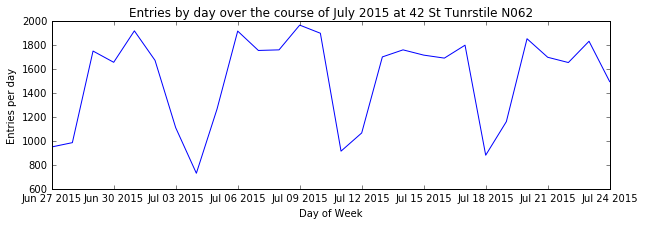

In [23]:
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
plt.title('Entries by day over the course of July 2015 at 42 St Tunrstile N062')
plt.xlabel('Day of Week')
plt.ylabel('Entries per day')

# challenge 5

In [24]:
ca_unit_station_by_day={}
for turn_key, turnstile_value in day_counts.items():
    prev_running_totals={}
    turnstile_daily_counts={}
    current_running_totals={}
    new_key=(turn_key[0],turn_key[1],turn_key[3])
    for date, count in ca_unit_station_by_day.get(new_key,[]):
        prev_running_totals[date]=count
    for date, count in turnstile_value:
        current_running_totals[date]=prev_running_totals.get(date,0)+count
    ca_unit_station_by_day[new_key]=sorted(current_running_totals.items())

In [26]:
print(list(ca_unit_station_by_day)[0:10])

[('N310', 'R140', 'QUEENS PLAZA'), ('B023', 'R211', 'KINGS HIGHWAY'), ('B020', 'R263', 'AVE H'), ('N558', 'R130', 'KINGS HIGHWAY'), ('N556', 'R424', 'AVE P'), ('R261', 'R205', '149 ST-GR CONC'), ('N548', 'R420', 'DITMAS AVE'), ('N186', 'R418', 'BEACH 105 ST'), ('R404', 'R447', 'CYPRESS AVE'), ('N418', 'R269', 'BEDFORD/NOSTRAN')]


answer = ca_unit_station_by_day

# challenge 6

In [27]:
station_by_day={}
for turn_key, turnstile_value in ca_unit_station_by_day.items():
    prev_running_totals={}
    turnstile_daily_counts={}
    current_running_totals={}
    new_key=(turn_key[2])
    for date, count in ca_unit_station_by_day.get(new_key,[]):
        prev_running_totals[date]=count
    for date, count in turnstile_value:
        current_running_totals[date]=prev_running_totals.get(date,0)+count
    station_by_day[new_key]=sorted(current_running_totals.items())

In [29]:
print(list(station_by_day)[0:10])

['CLASSON AVE', '86 ST', 'BEDFORD AVE', 'RECTOR ST', '219 ST', '3 AVE', '149 ST-3 AVE', '161 ST-YANKEE', 'AQUEDUCT TRACK', 'BEACH 44 ST']


answer = station_by_day

# challenge 7

In [30]:
#select one station for analysis

lowery = station_by_day['40 ST-LOWERY ST']

In [31]:
#split lists into two lists
dates = []
counts = []

for station in lowery:
        dates.append(station[0])
        counts.append(station[1])

In [32]:
print(counts)

[6634, 5532, 10248, 10394, 10424, 10469, 7452, 5995, 4921, 9963, 10504, 10388, 10321, 10464, 7095, 5427, 10204, 10386, 10497, 10629, 10285, 6812, 5350, 10253, 10617, 10709, 10677, 9550]


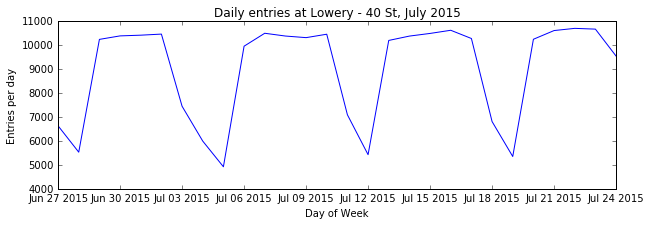

In [34]:
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
plt.title('Daily entries at Lowery - 40 St, July 2015')
plt.xlabel('Day of Week')
plt.ylabel('Entries per day')

# challenge 8

In [43]:
lowery

[(datetime.date(2015, 6, 27), 6634),
 (datetime.date(2015, 6, 28), 5532),
 (datetime.date(2015, 6, 29), 10248),
 (datetime.date(2015, 6, 30), 10394),
 (datetime.date(2015, 7, 1), 10424),
 (datetime.date(2015, 7, 2), 10469),
 (datetime.date(2015, 7, 3), 7452),
 (datetime.date(2015, 7, 4), 5995),
 (datetime.date(2015, 7, 5), 4921),
 (datetime.date(2015, 7, 6), 9963),
 (datetime.date(2015, 7, 7), 10504),
 (datetime.date(2015, 7, 8), 10388),
 (datetime.date(2015, 7, 9), 10321),
 (datetime.date(2015, 7, 10), 10464),
 (datetime.date(2015, 7, 11), 7095),
 (datetime.date(2015, 7, 12), 5427),
 (datetime.date(2015, 7, 13), 10204),
 (datetime.date(2015, 7, 14), 10386),
 (datetime.date(2015, 7, 15), 10497),
 (datetime.date(2015, 7, 16), 10629),
 (datetime.date(2015, 7, 17), 10285),
 (datetime.date(2015, 7, 18), 6812),
 (datetime.date(2015, 7, 19), 5350),
 (datetime.date(2015, 7, 20), 10253),
 (datetime.date(2015, 7, 21), 10617),
 (datetime.date(2015, 7, 22), 10709),
 (datetime.date(2015, 7, 23), 1

In [35]:
list1 = lowery[:7]
list2 = lowery[7:14]
list3 = lowery[14:21]
list4 = lowery[21:]
week1 = [x[1] for x in list1]
week2 = [x[1] for x in list2]
week3 = [x[1] for x in list3]
week4 = [x[1] for x in list4]

(-0.25, 6.25, 4000.0, 11000.0)

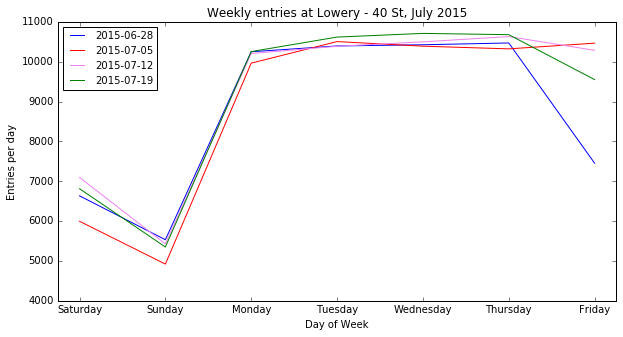

In [36]:
fig = plt.figure(figsize=(10,5))
x = [0,1,2,3,4,5,6]
plt.plot(x,week1,'blue',label=list1[1][0])
plt.plot(x,week2,'red',label=list2[1][0])
plt.plot(x,week3,'violet',label=list3[1][0])
plt.plot(x,week4,'green', label=list4[1][0])

plt.title('Weekly entries at Lowery - 40 St, July 2015')
plt.xlabel('Day of Week')
plt.ylabel('Entries per day')
plt.legend(loc=2,prop={'size':10})


days = ['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
plt.xticks(x, days, rotation=0)
plot_margin = 0.25

x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin,
          x1 + plot_margin,
          y0 ,
          y1))

# challenge 9

In [37]:
total_counts = defaultdict(list)


for station, rows in station_by_day.items():
    for _, count in rows:
        total_counts[station] = total_counts.get(station, 0) + count
        
total_counts = sorted(total_counts.items(),key = operator.itemgetter(1),reverse=True)

In [38]:
total_counts[:10]

[('42 ST-GRD CNTRL', 1661950),
 ('PATH WTC', 944753),
 ('JAMAICA CENTER', 757789),
 ('68ST-HUNTER COL', 696889),
 ('W 4 ST-WASH SQ', 670181),
 ('77 ST', 661125),
 ('SUTPHIN BLVD', 612362),
 ('14 ST-UNION SQ', 601323),
 ('42 ST-TIMES SQ', 592492),
 ('JUNCTION BLVD', 530347)]

answer is total_counts

# challenge 10

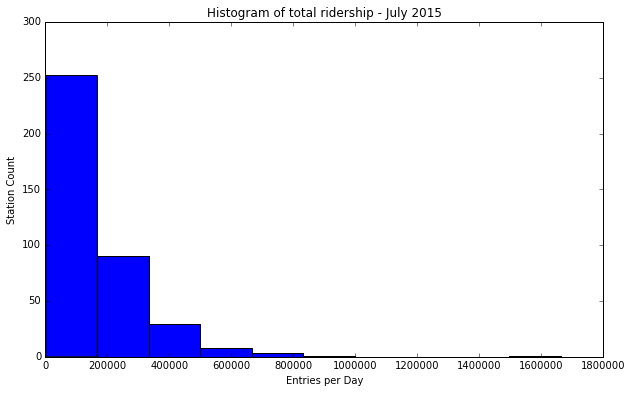

In [41]:
plt.figure(figsize=(10,6
                   ))

total_ridership_counts = [x[1] for x in total_counts]

plt.hist(total_ridership_counts)
plt.ylabel('Station Count')
plt.xlabel('Entries per Day')
plt.title('Histogram of total ridership - July 2015')

